# Внимание!
Перед началом работы, нужно запустить импорт всех библиотек и функцию обработки csv файла.
Спасибо за внимание :)

In [5]:
# Импорт всех библиотек 
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq, irfft
import csv
import math
import pywt
import numpy as np 

# Функция обработки csv файла 

In [4]:
def get_csv_coord(csv_path):
    import csv
    """
    Получает на вход csv файл с координатами, разделитель - запятая, десятичная часть числа отделяется точкой
    :param csv_path: путь до csv файла
    :return: массив вида [[x1, y1], [x2, y2], ...]
    """
    coordinates = []
    with open(csv_path, 'r') as f:
        reader = csv.reader(f)
        count = 0
        for line in reader:
            x = line[0]
            y = line[1]
            try:
                x = float(x)
                y = float(y)
            except ValueError:
                if count == 0:
                    count += 1
                    continue
                else:
                    return 'Лишние символы в координатах!'
            else:
                count += 1
                coordinates.append([x, y])
    return coordinates

# Преобразование Фурье  

In [97]:
def fourier(path):
    """
    Получает на вход csv файл с координатами, разделитель - запятая, десятичная часть числа отделяется точкой
    :param path: путь до csv файла
    :return: Готовое преобразование через scipy.rfft + коэффициент несинусоидальности
    """
    # Координаты 
    plan = get_csv_coord(path)
    x_coord = [i[0] for i in plan] 
    y_coord = [i[1] for i in plan]
    
    
    # Период
    T = (len(x_coord))/(x_coord[-1] - x_coord[0])
    
    # Преобразование Фурье
    x_rfft = rfftfreq(len(y_coord), 1 / T) 
    y_rfft = [abs(element) for element in rfft(y_coord)]
    y_rfft1 = [(element) for element in rfft(y_coord)]
    
    # Обратное преобразование Фурье
    y_irfft = [element for element in irfft(y_rfft1)]

    
    # Нахождения коэффициента несинусоидальности
    step = x_rfft[1] - x_rfft[0]
    S0 = ((y_rfft[y_rfft.index(max(y_rfft)) + 1] + y_rfft[y_rfft.index(max(y_rfft)) + 1])/2 + y_rfft[y_rfft.index(max(y_rfft))])*step
    Si = 0
    for i in range(1, len(y_rfft)):
        Si += (y_rfft[i-1] + y_rfft[i])* step/2
 
    # Вывод графиков
    sigma = sum([(y_coord[j] - y_irfft[j]) ** 2 for j in range(len(y_coord))])
    
    plt.figure(figsize=(25, 20))
    plt.subplot(2, 1, 2)
    plt.plot(x_rfft, y_rfft, color = '#9400D3',label=f'Коэффициент несинусоидальности = {(Si-S0)/S0}')
    plt.legend(loc='center', bbox_to_anchor=(0.5, -0.25), fontsize = 20)
    plt.grid()
    plt.xlabel('Гц')
    plt.title('АЧХ')
    plt.subplot(2, 1, 1)
    plt.plot(x_coord, y_coord, '-o', label ='Исходная функция')
    plt.plot(x_coord, y_irfft, color = 'green', linestyle = '--', label ='Обратное преобразование Фурье')
    plt.legend(loc='center', bbox_to_anchor=(0.5, 1.1), fontsize = 20)
    plt.title(f'Дисперсия = {sigma}', loc = 'right', fontsize=22)
    plt.grid()
    plt.show()


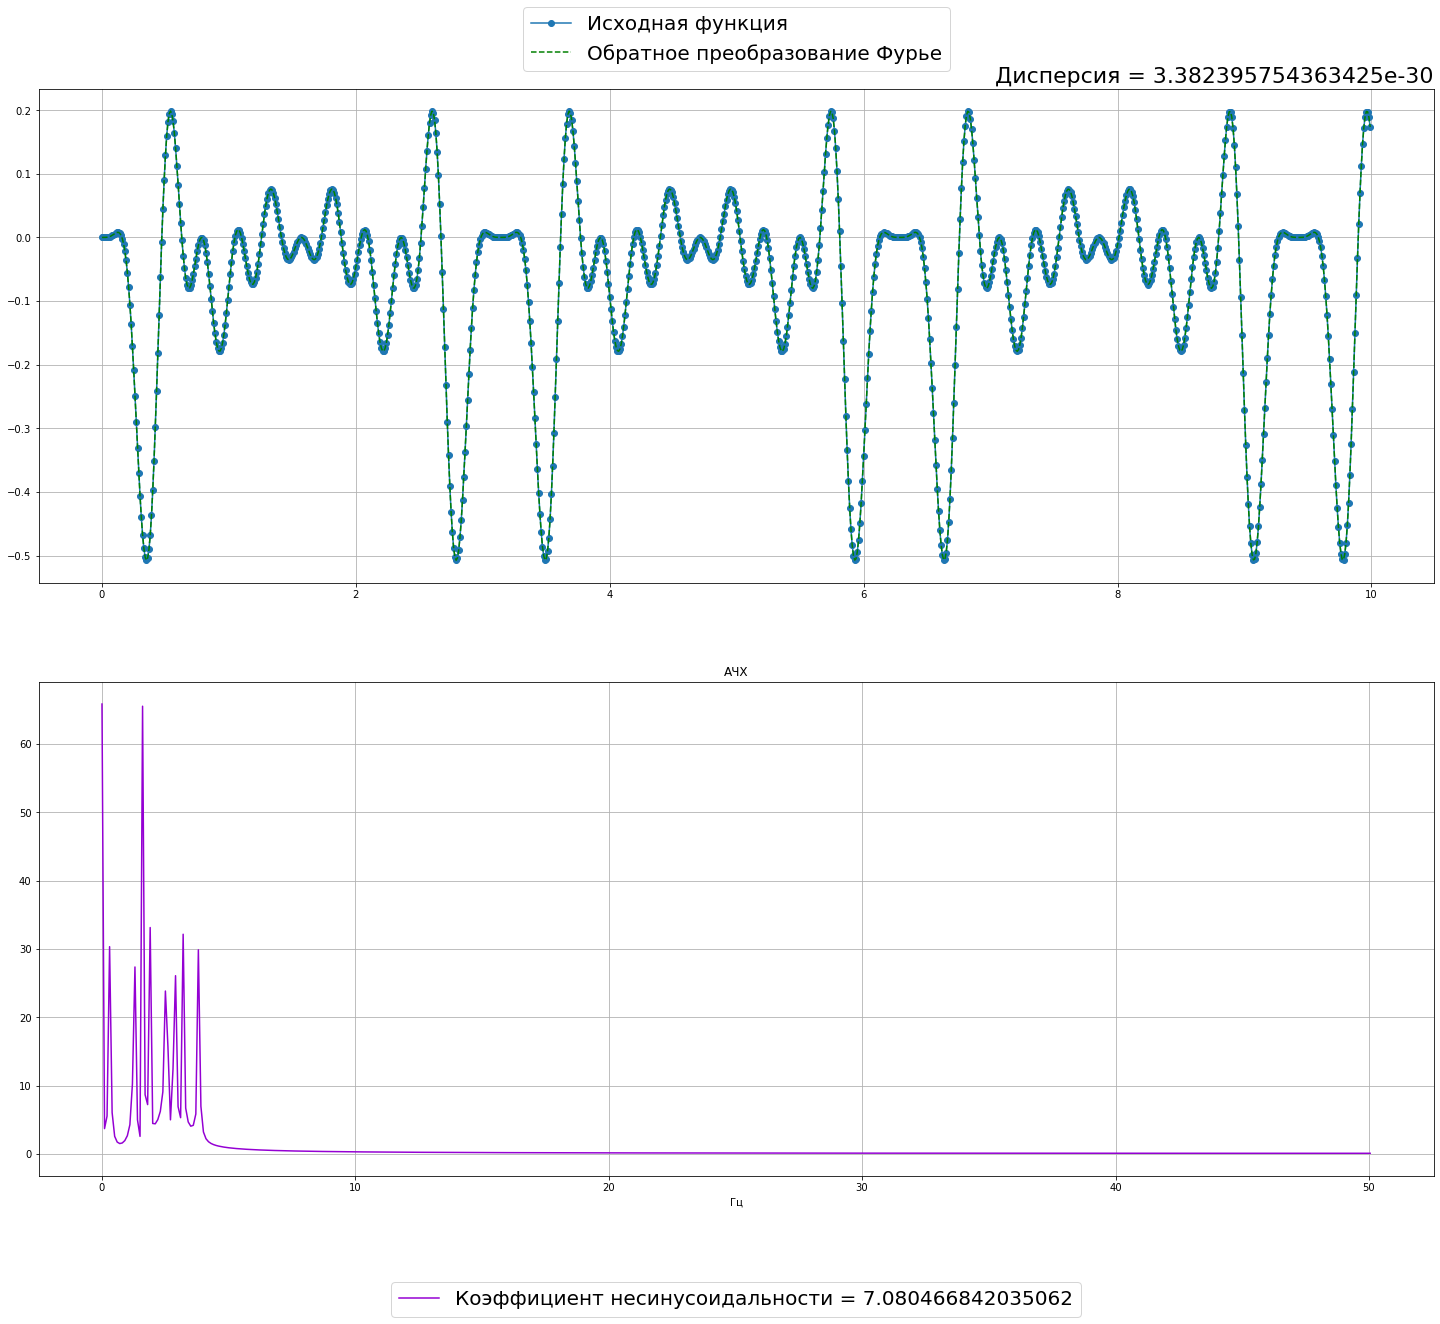

In [100]:
fourier('Test_sin.csv') 

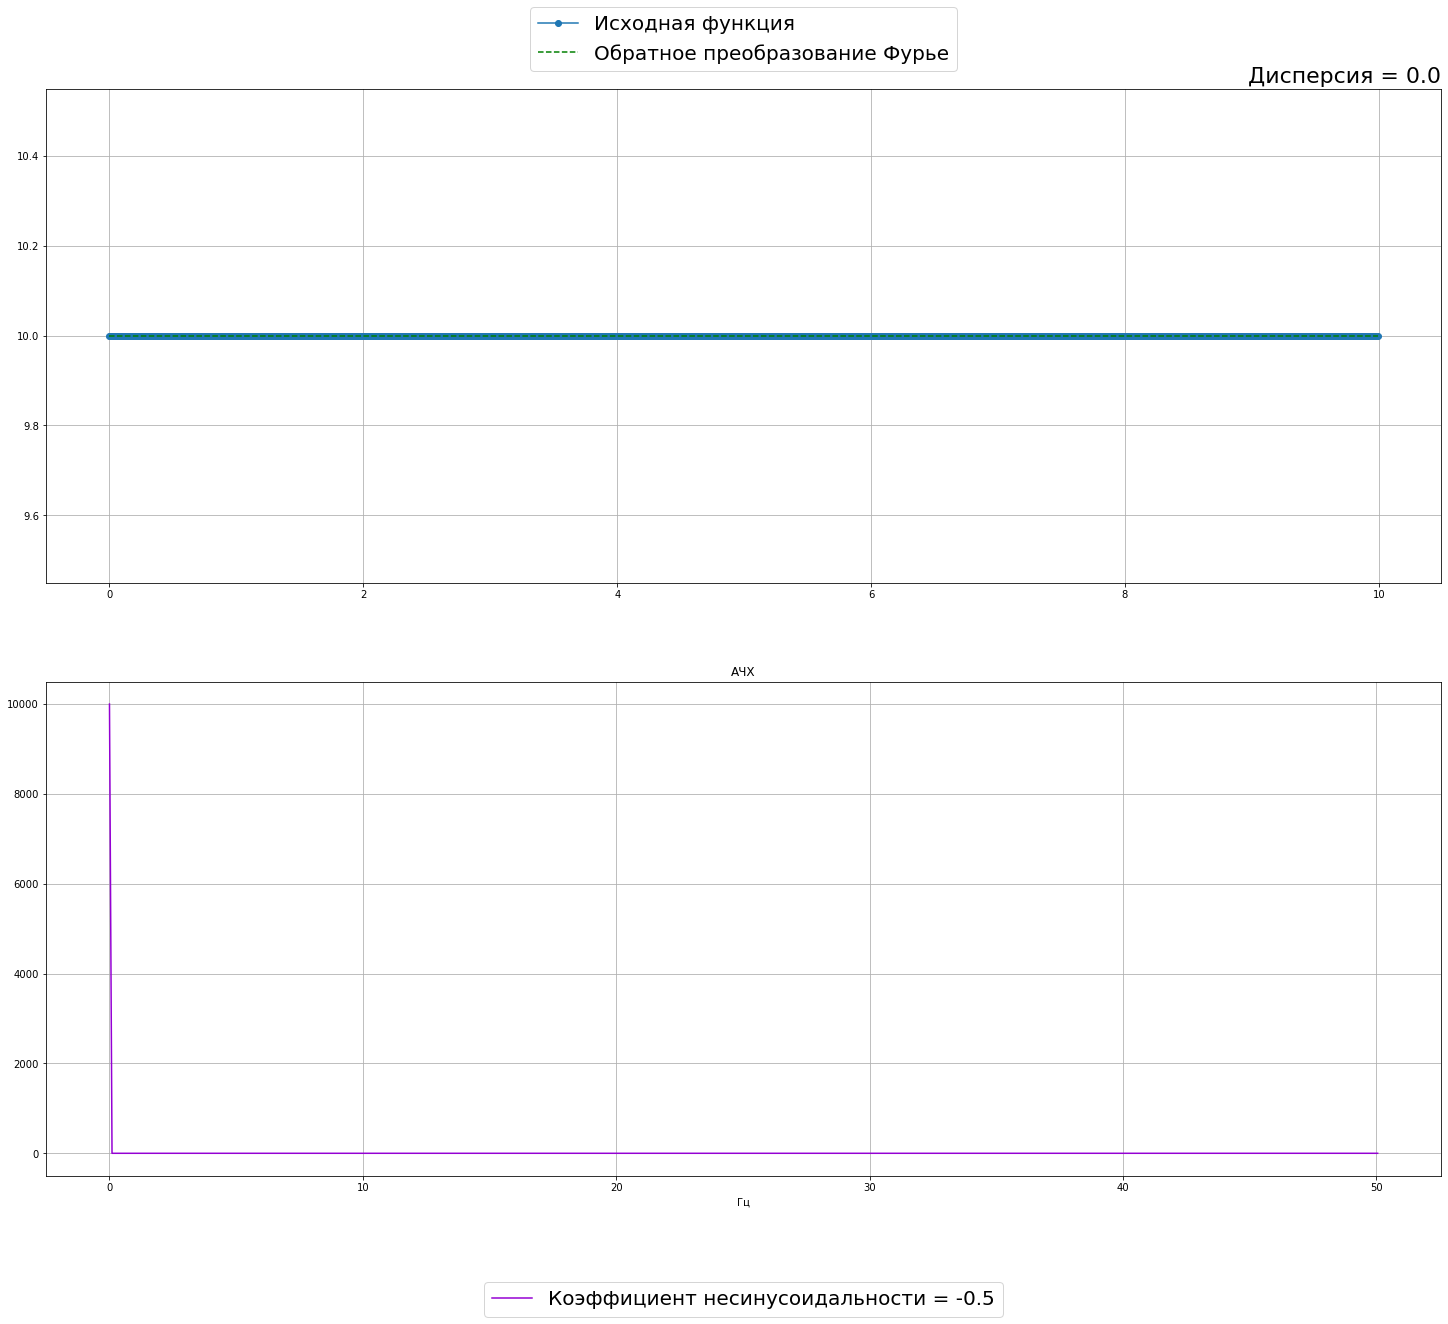

In [101]:
fourier('Line.csv')

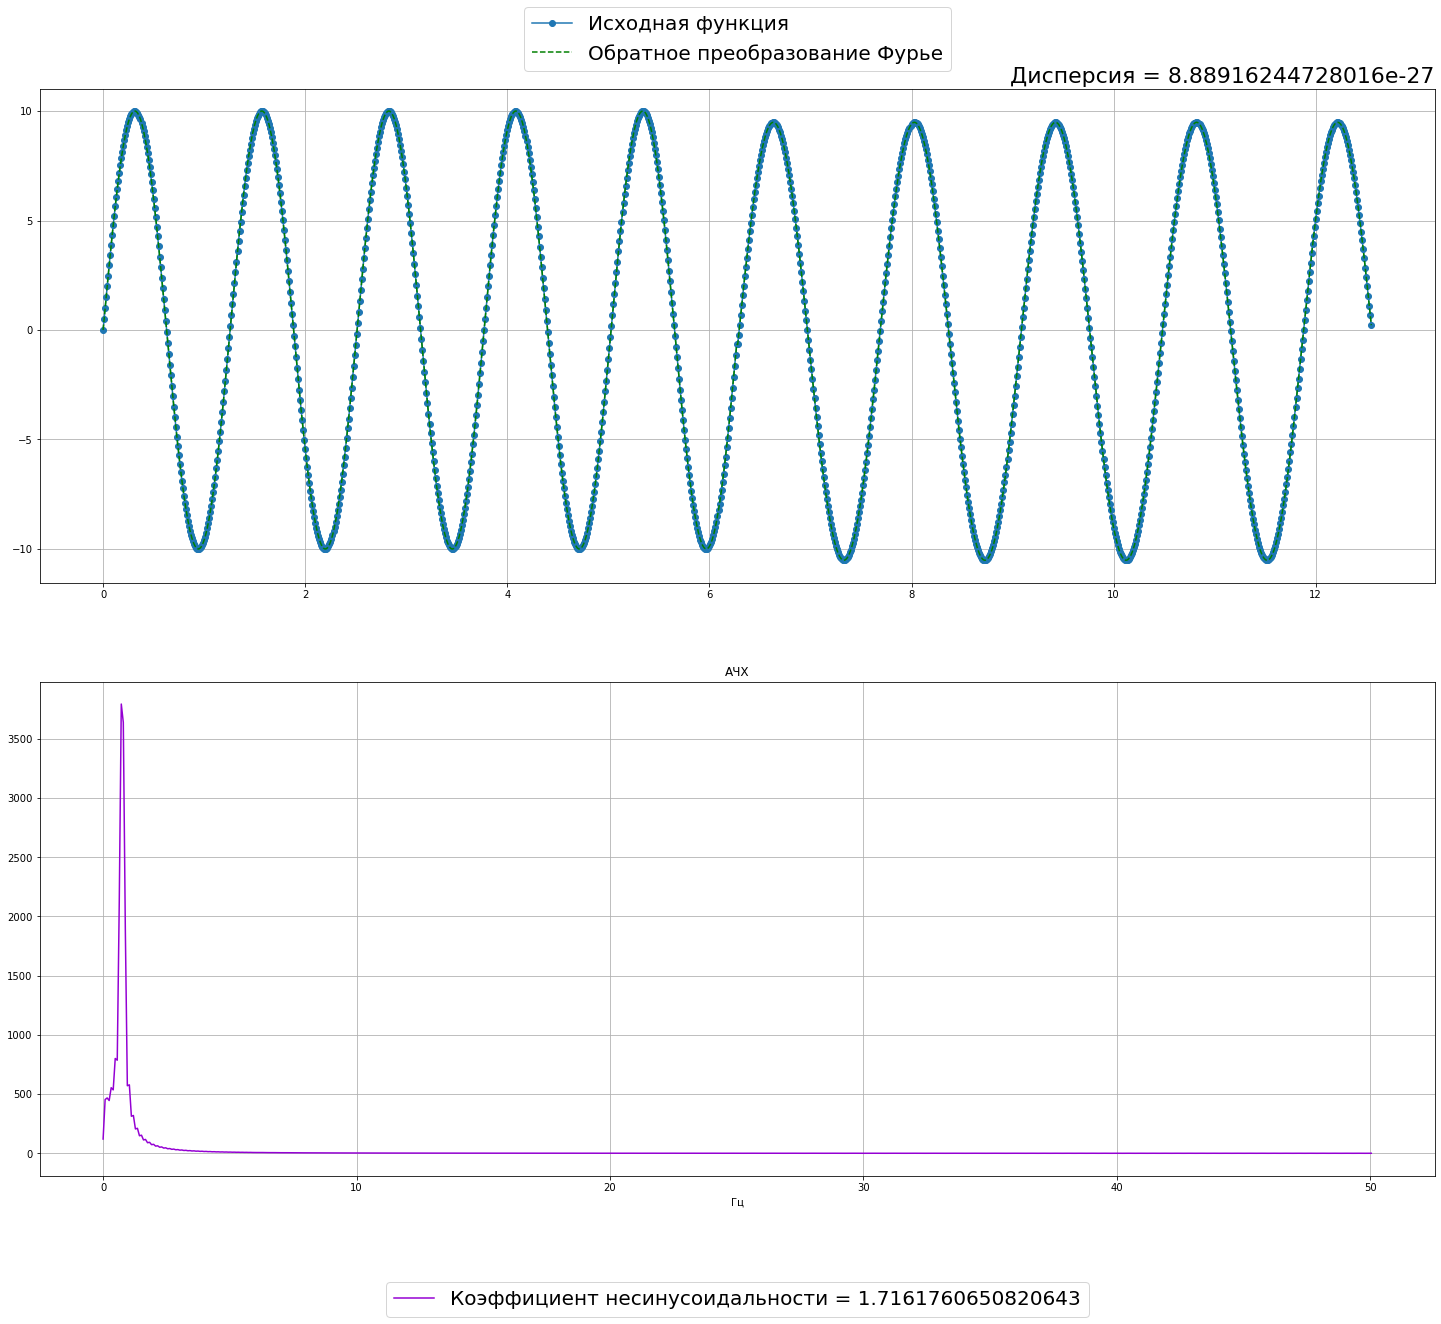

In [102]:
fourier('2_sin_5_4.5.csv')

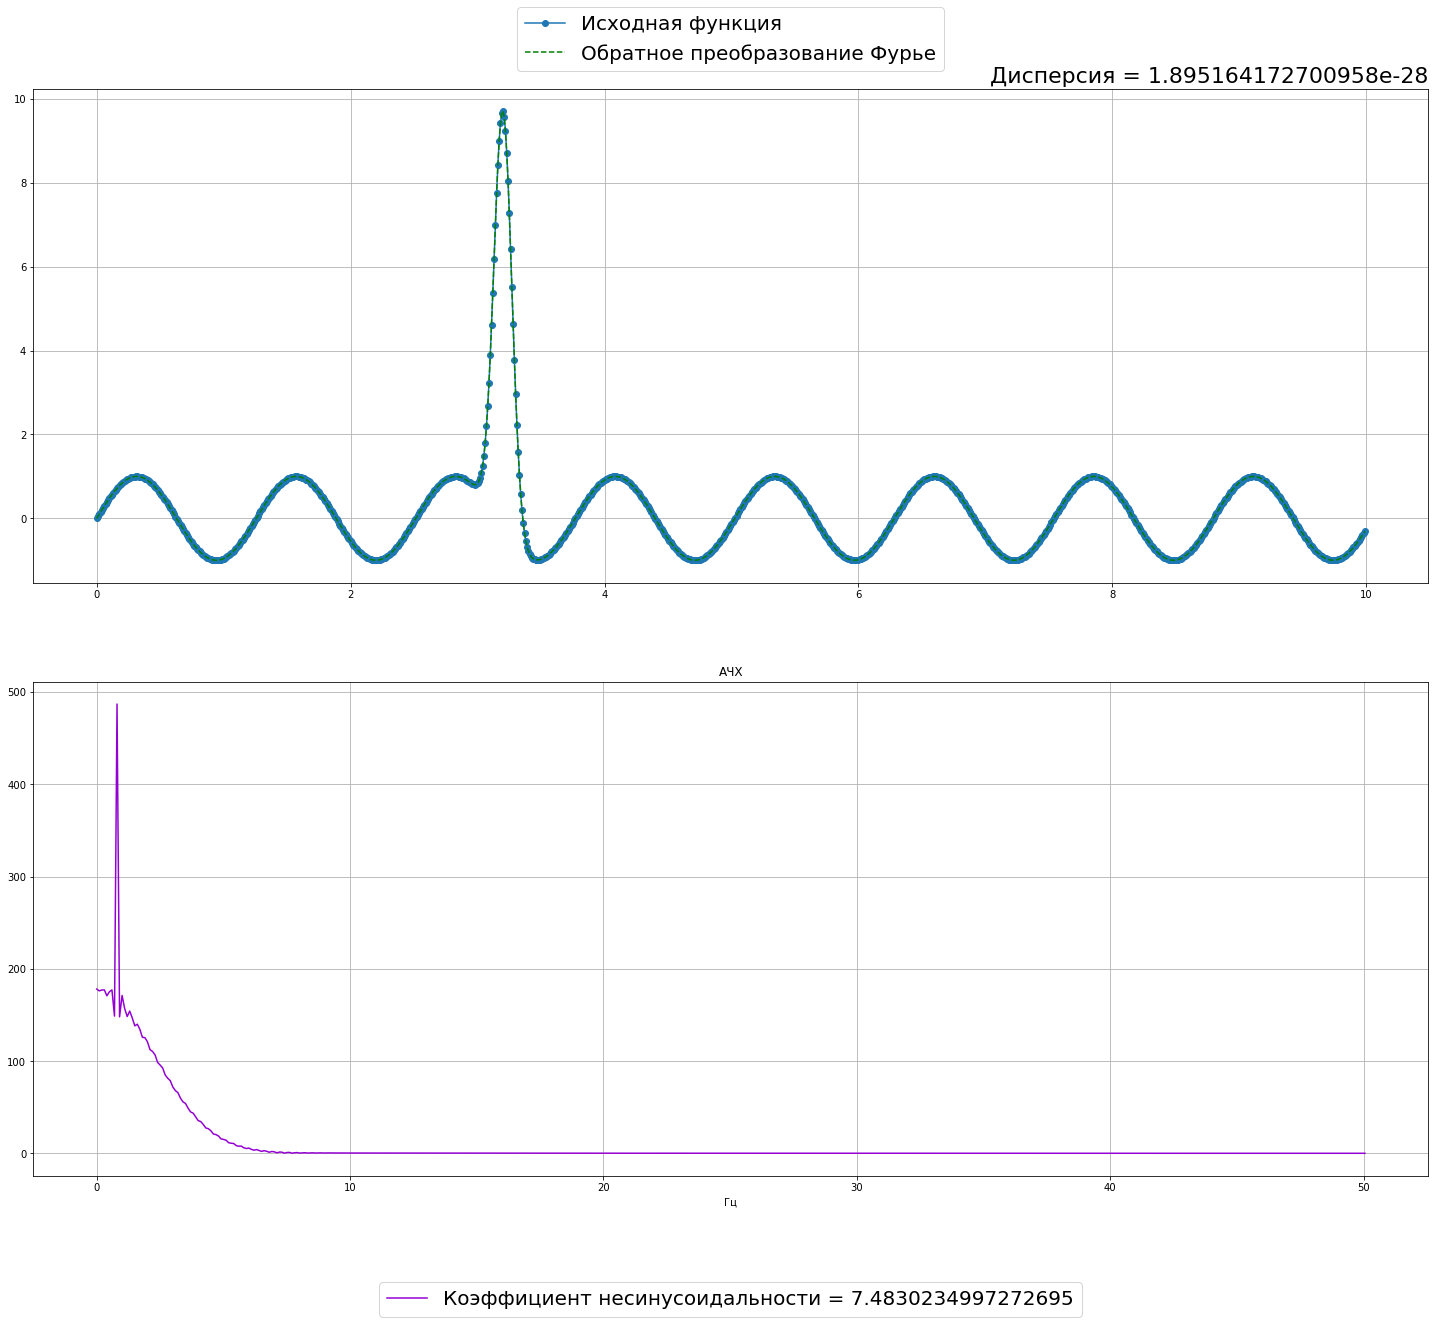

In [103]:
fourier('sin_peak.csv')

# Вейвлет преобразование 

In [6]:
def wavelets_d(path, name):
    """
    Получает на вход csv файл с координатами, разделитель - запятая, десятичная часть числа отделяется точкой
    :param path: Путь до csv файла
    :param name: Тип функции преобразования. Работает для Haar (haar) и Daubechies (db)
    :return: Готовое преобразование через pywt + коэффициент несинусоидальности
    """
    # Координаты 
    plan = get_csv_coord(path)
    x_coord = [i[0] for i in plan] 
    y_coord = [i[1] for i in plan]
    
    # Вейвелт преобразование до 4 уровня
    coeffs_wav = pywt.wavedec(y_coord, name, level=4) 
    
    # Находим коэффициент несинусиоидальности
    cf_sin = 0
    for i in range(1, len(coeffs_wav) - 1):
        cf_sin += np.std(coeffs_wav[i])**2
    cf_sin = cf_sin/np.std(coeffs_wav[0])
    print(f'Коэффициент несинусиоидальности {cf_sin}')
    
    
    # Строим графики
    fig, axes = plt.subplots(3, 2)
    
    # Исходные данные
    axes[0][0].plot(x_coord, y_coord, color = '#8B0000')
    axes[0][0].set(title = 'Исходные данные')
    axes[0][0].grid()
    # Апроксимация
    axes[0][1].plot(coeffs_wav[0], color = '#8B0000')
    axes[0][1].set(title = 'Апроксимация')
    axes[0][1].grid()
    # Уровень 1
    axes[1][0].plot(coeffs_wav[4], color = '#8B0000')
    axes[1][0].set(title = 'Уровень 1')
    axes[1][0].grid()
    # Уровень 2
    axes[1][1].plot(coeffs_wav[3], color = '#8B0000')
    axes[1][1].set(title = 'Уровень 2')
    axes[1][1].grid()
    # Уровень 3
    axes[2][0].plot(coeffs_wav[2], color = '#8B0000')
    axes[2][0].set(title = 'Уровень 3')
    axes[2][0].grid()
    # Уровень 4  
    axes[2][1].plot(coeffs_wav[1], color = '#8B0000')
    axes[2][1].set(title = 'Уровень 4')
    axes[2][1].grid()


    
    fig.suptitle(f'{name}')
    fig.set_figwidth(20)
    fig.set_figheight(20)
    plt.show()
    

Коэффициент несинусиоидальности 0.18730686281158812


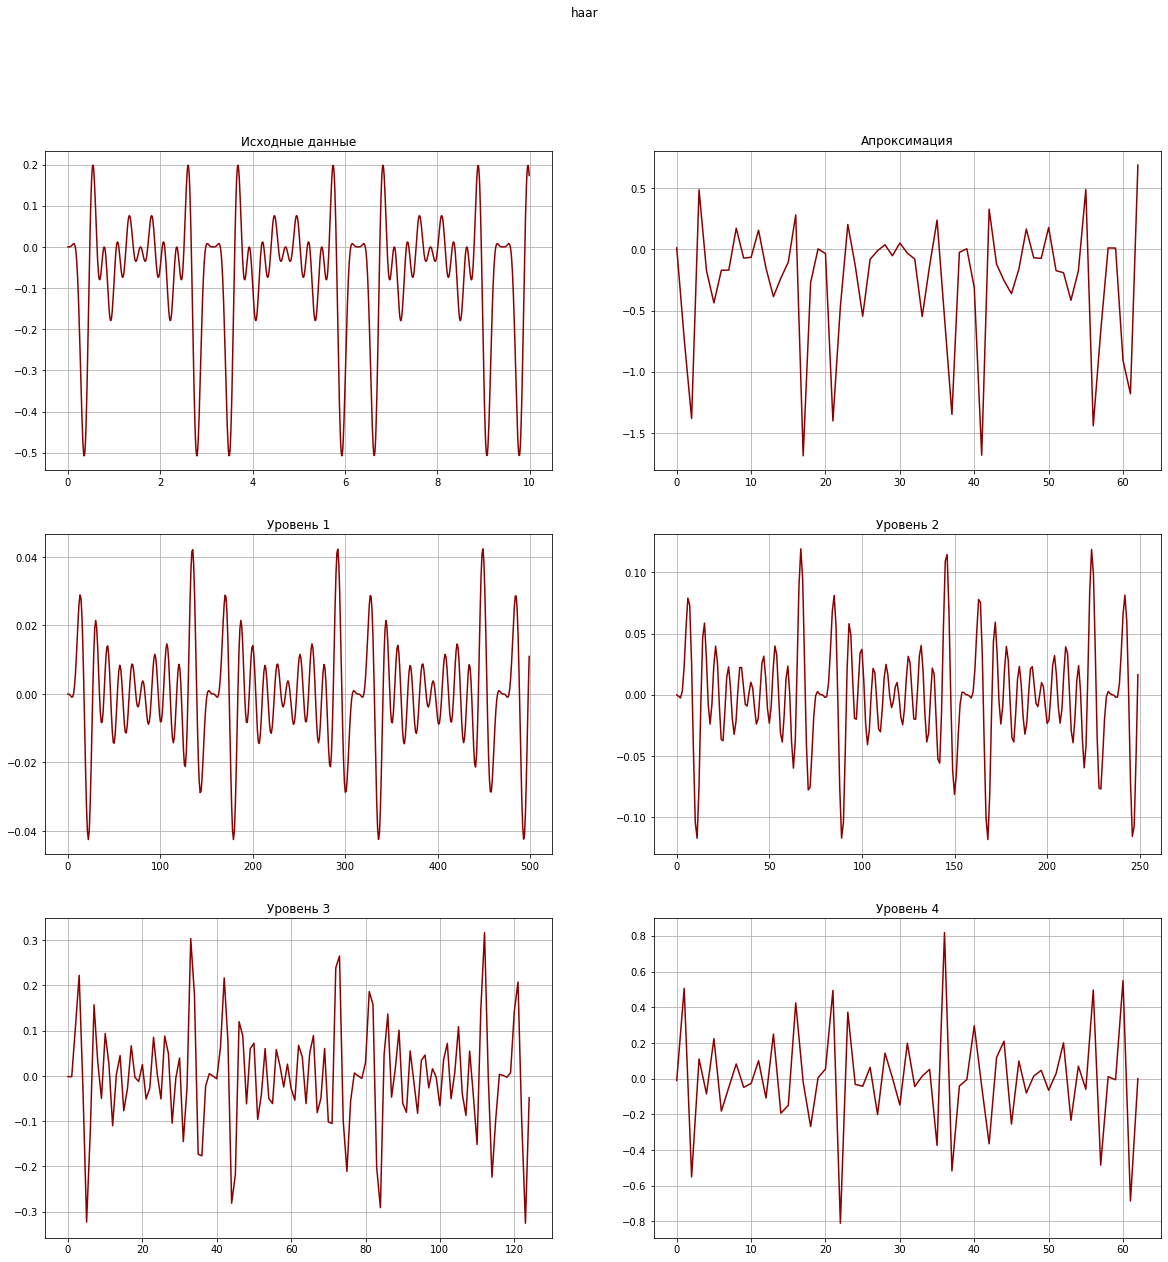

In [7]:
# На основе Haar
wavelets_d('Test_sin.csv', 'haar')

Коэффициент несинусиоидальности 0.14993753024915277


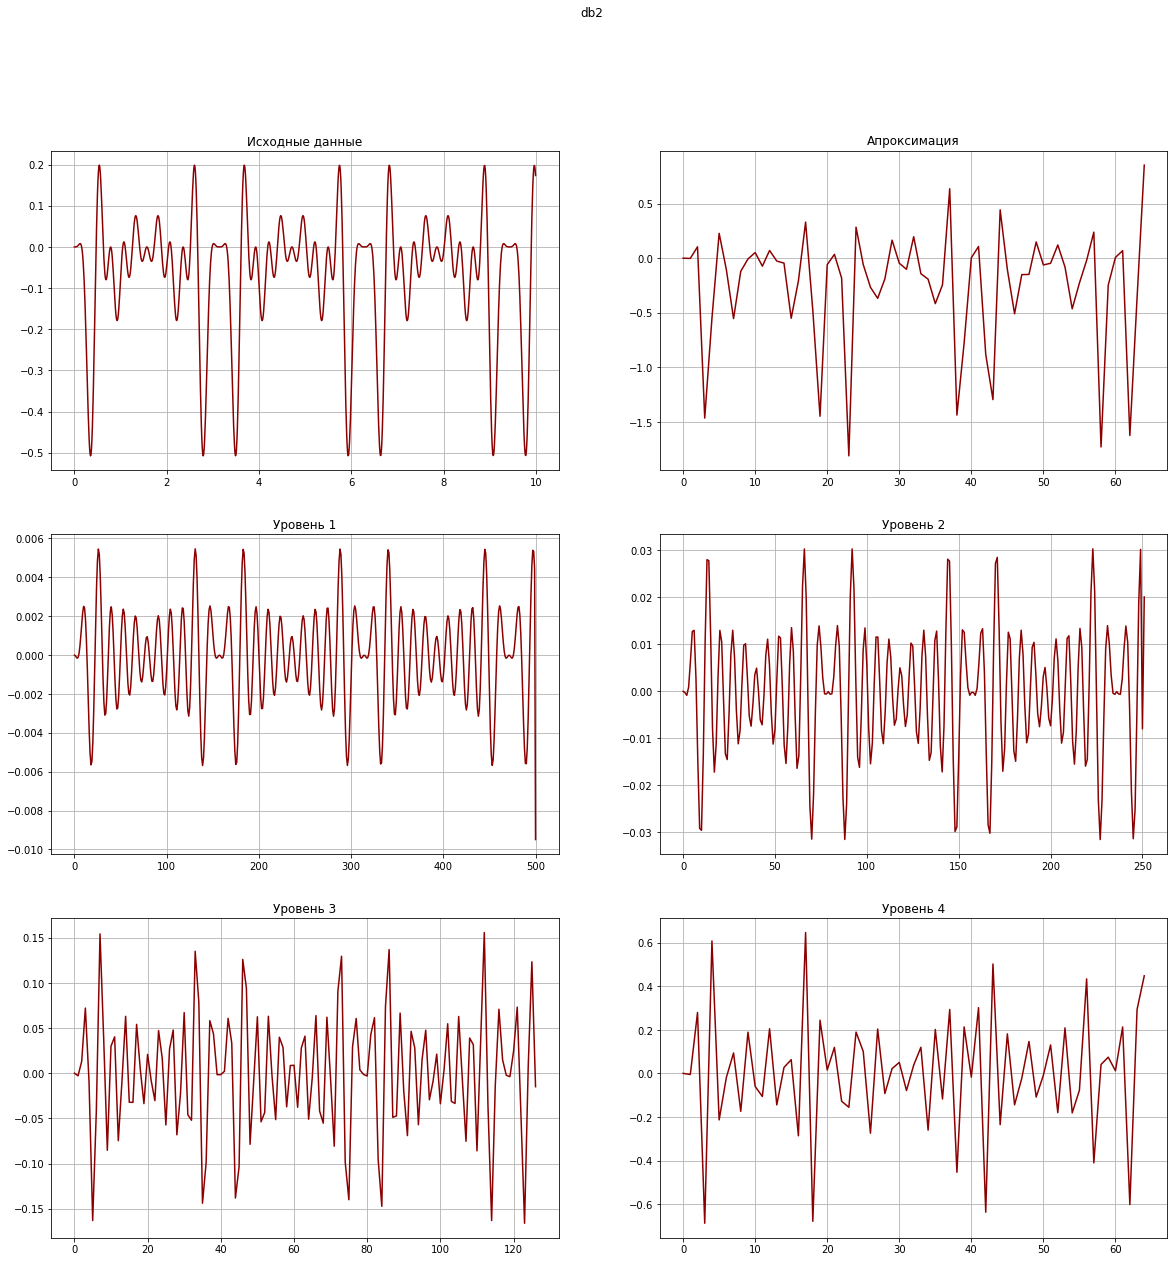

In [70]:
# На основе Daubechies
wavelets_d('Test_sin.csv', 'db2')

In [23]:
def wavelets_i(path, name):
    """
    Получает на вход csv файл с координатами, разделитель - запятая, десятичная часть числа отделяется точкой
    :param path: Путь до csv файла
    :param name: Тип функции преобразования. Работает для Gaussian wavelets (gaus) и Mexican hat wavelet (mexh)
    :return: Готовое преобразование через pywt + коэффициент несинусоидальности
    """
    # Координаты 
    plan = get_csv_coord(path)
    x_coord = [i[0] for i in plan] 
    y_coord = [i[1] for i in plan]
    
    # Вейвелт преобразование до 4 уровня
    wavelet = pywt.ContinuousWavelet(name, level = 4)
    
    # Начинаем строить графики
    fig, axes = plt.subplots(2,2)
    fig.suptitle(f'{name}')
    
    # Уровень 1
    coef, freqs = pywt.cwt(y_coord, np.arange(1, 257), wavelet)
    axes[0][0].plot(coef[0])
    axes[0][0].set_xlim([3, 995])
    axes[0][0].set_title('Уровень 1', loc = "center", pad = 17)
    # Уровень 2
    coef, freqs = pywt.cwt(coef[0], np.arange(1, 257), wavelet)
    axes[0][1].plot(coef[0])
    axes[0][1].set_xlim([3, 995])
    axes[0][1].set_title('Уровень 2',loc = "center", pad = 17)
    # Уровень 3
    coef, freqs = pywt.cwt(coef[0], np.arange(1, 257), wavelet)
    axes[1][0].plot(coef[0])
    axes[1][0].set_xlim([3, 995])
    axes[1][0].set_title('Уровень 3',loc = "center", pad = 17)
    # Уровень 4
    coef, freqs = pywt.cwt(coef[0], np.arange(1, 257), wavelet)
    axes[1][1].plot(coef[0])
    axes[1][1].set_xlim([3, 995])
    axes[1][1].set_title('Уровень 4',loc = "center", pad = 17)

    fig.set_figwidth(18)
    fig.set_figheight(12)
    plt.show()
    

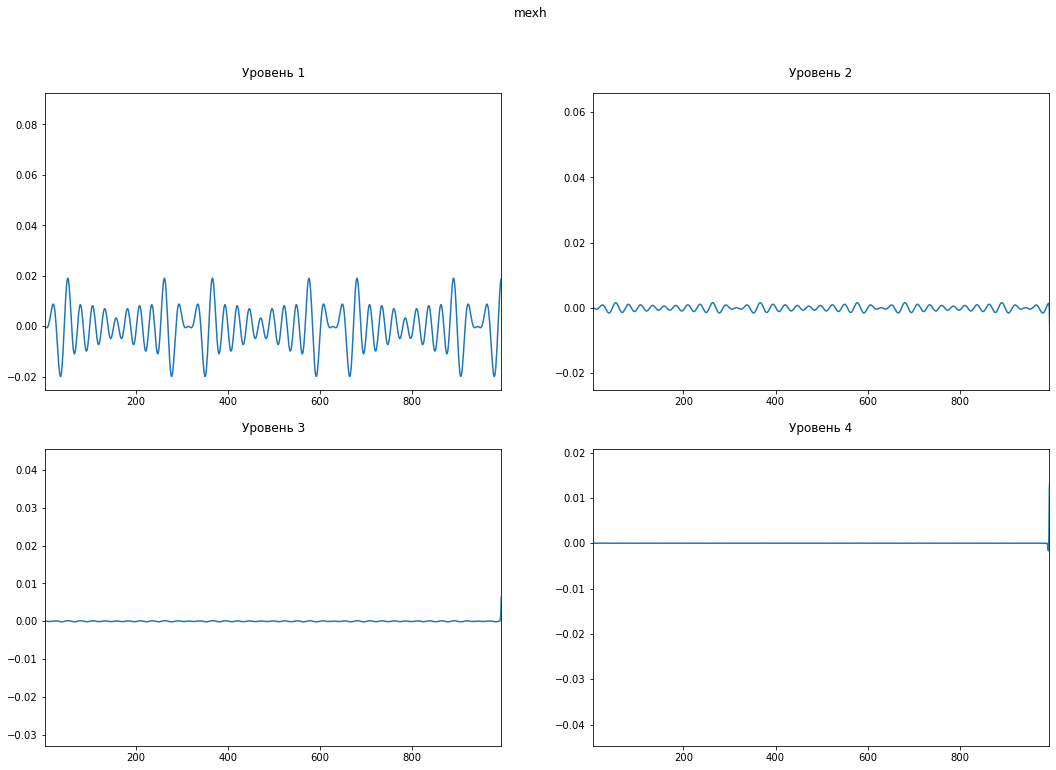

In [24]:
# На основе Mexican hat wavelet 
wavelets_i('Test_sin.csv', 'mexh')

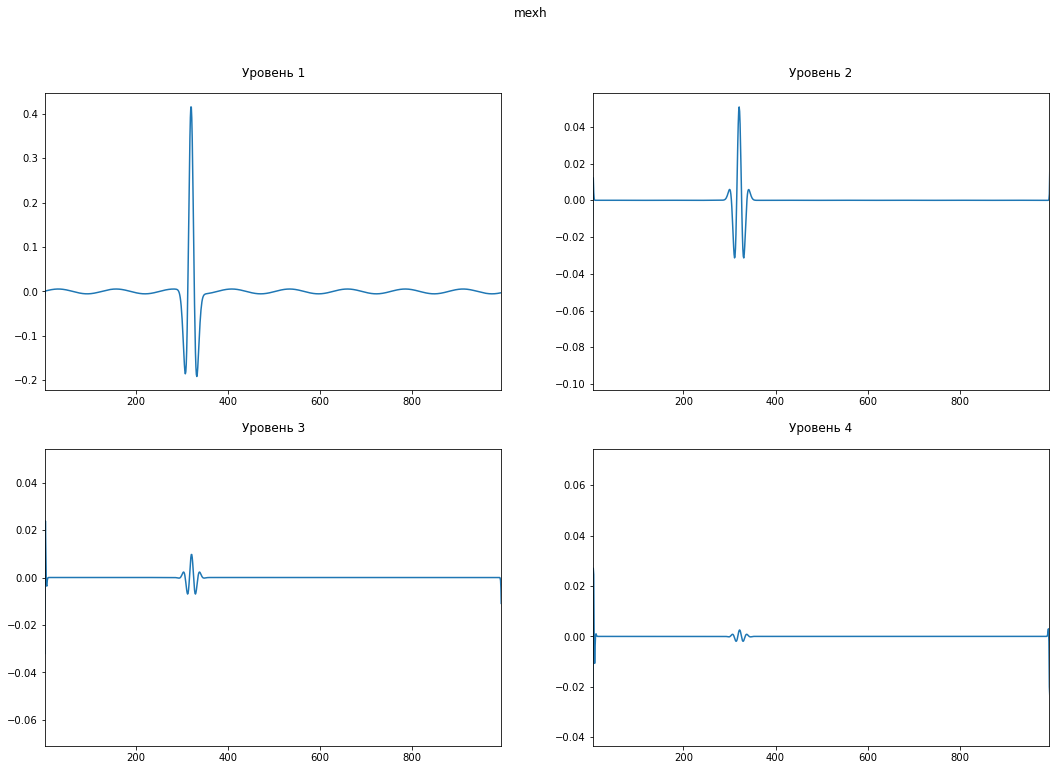

In [25]:
wavelets_i('sin_peak.csv', 'mexh')

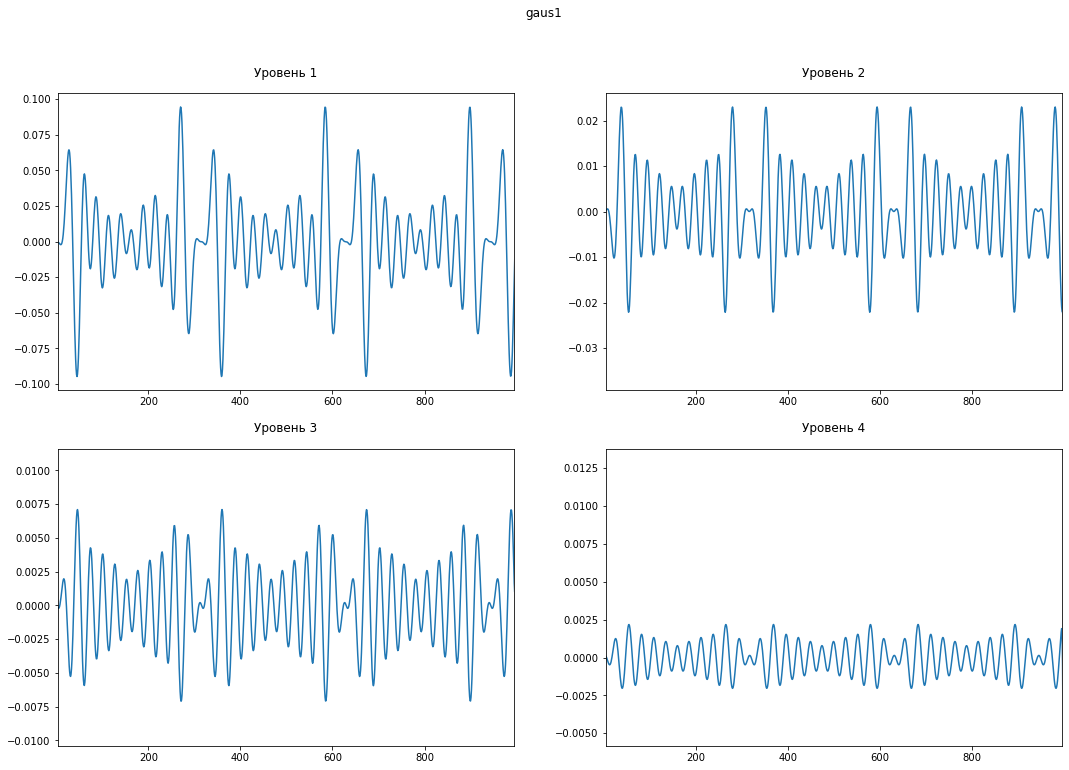

In [26]:
# На основе Gaussian wavelets 
wavelets_i('Test_sin.csv', 'gaus1')

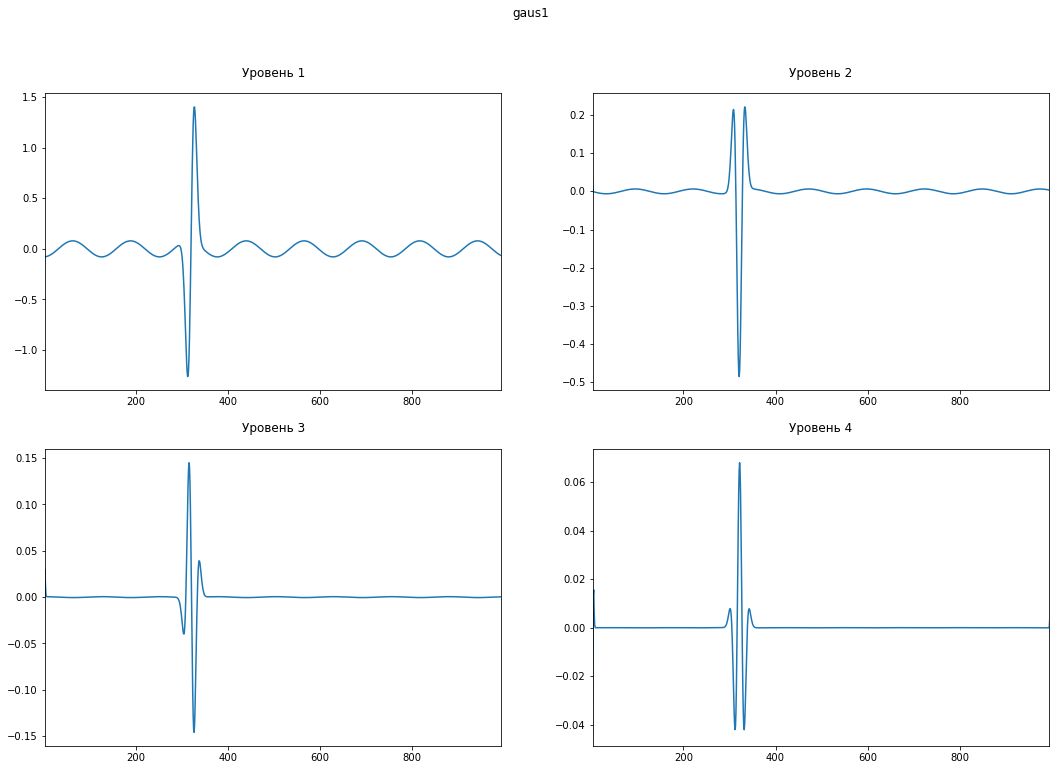

In [27]:
wavelets_i('sin_peak.csv', 'gaus1')